In [1]:
import os
import tensorflow as tf
import pandas as pd
import numpy as np
import cv2
from skimage.io import imshow, imread
os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED'
import IPython.display as display
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12, 12)
mpl.rcParams['axes.grid'] = False
import numpy as np
import PIL.Image
import time
import functools
import tensorflow_hub as hub
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import time

### Desciption
This file is just a demo testing the effects of Neural style transfer using tensorflow_hub pre-built model.
Full code avilable at: https://www.tensorflow.org/tutorials/generative/style_transfer#build_the_model

#### 1. Select an image folder here
You will need to have a folder with images contained in the same directory as the 'notebook' folder, with the 'notebook' folder containing this .ipynb file.<br>
- content: Your target image folder to run Sytle transfer on.
- style: Your sytle image folder.
Example: "samuel_john_peploe" as the style folder and 'test' containing my target images.
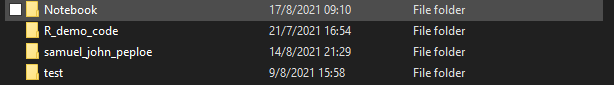

In [2]:
content_folder = ''
style_folder = ''
art_meta = None
art_colour = None
image_formats = ['.jpg', '.jpeg', '.gif', '.png']
@interact
def content_folder(content = [f for f in os.listdir('../') if '.' not in f],
                  style = [f for f in os.listdir('../') if '.' not in f]):
    global content_folder, style_folder
    content_folder = content
    style_folder = style

interactive(children=(Dropdown(description='content', options=('LICENSE', 'MSc-CS-Project---ColourPaletteExtra…

In [3]:
def tensor_to_image(tensor):
    tensor = tensor*255
    tensor = np.array(tensor, dtype=np.uint8)
    if np.ndim(tensor)>3:
        assert tensor.shape[0] == 1
        tensor = tensor[0]
    return PIL.Image.fromarray(tensor)

def load_img(path_to_img):
    max_dim = 512
    img = tf.io.read_file(path_to_img)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)

    shape = tf.cast(tf.shape(img)[:-1], tf.float32)
    long_dim = max(shape)
    scale = max_dim / long_dim

    new_shape = tf.cast(shape * scale, tf.int32)

    img = tf.image.resize(img, new_shape)
    img = img[tf.newaxis, :]
    return img

def imshow(image, title=None):
    if len(image.shape) > 3:
        image = tf.squeeze(image, axis=0)

    plt.imshow(image)
    if title:
        plt.title(title)

#### Fast Style Transfer using TF-Hub, Example code
- content_file: the target image you want to apply style on

<br>
- style_file: the image to have style tranfered from


In [4]:
content_image = ''
style_image = ''
@interact
def Example_Fast_Transfer(
    content_file = [file for file in os.listdir('../' + str(content_folder))
                    if any(word in file for word in image_formats)],
    style_file = [file for file in os.listdir('../' + str(style_folder))
                    if any(word in file for word in image_formats)]):
    
    global style_image, content_image, content_folder, style_folder
    
    content_image = load_img("../" + str(content_folder) + "/" + content_file)
    style_image = load_img("../" + str(style_folder) + "/" + style_file)

    plt.subplot(1, 2, 1)
    imshow(content_image, 'Content Image')

    plt.subplot(1, 2, 2)
    imshow(style_image, 'Style Image')
    
    hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
    stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]
    tensor_to_image(stylized_image)
    
    plt.figure(num=None, figsize=(10, 10))
    imshow(stylized_image, 'Style Transfered Image')
    
    plt.show()

interactive(children=(Dropdown(description='content_file', options=('normalface1.jpg', 'vase.jpg'), value='nor…